![imagen](./img/ejercicios.png)

# INFORMACIÓN DEL PROYECTO

### TÍTULO

#### Kapital & Markets: Criptomonedas

### TEMA

##### Vamos a exponer cifras y datos curiosos de cómo ha evolucionado un tema que cada día está más de moda y cómo el mercado bursátil tiene cada vez más demanda sobre el mercado de las criptomonedas

### HIPÓTESIS

Define aquí lo que será la hipótesis de tu proyecto.
Puede que tengas más de una, pero tu proyecto lo harás teniendo una principal hipótesis.

#### Mi principal hipótesis consistirá en ver cómo aumenta el volumen de capitalización en las principales criptomonedas y cómo llega a ser tan volátil este mercado. Nos centraremos en datos para comprobar cual viene a ser el volumen diario con el paso de los años desde que se creó el Bitcoin y cómo fluctúan las demás monedas.

## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

Incluye aquí una breve descripción del dataset o datasets de los que partirás para poder evaluar tu hipótesis. <br>
También incluye el origen de estos datos y su fuente.

#### https://coinmarketcap.com/
#### https://es.investing.com/crypto/
#### https://www.xataka.com/basics/criptomonedas-que-como-funcionan-que-otras-existen-bitcoin
#### https://www.osi.es/es/campanas/criptomonedas/historia-criptomonedas

Muestra mediante un head() los principales datasets con los que vas a trabajar

In [ ]:
import pandas as pd
import requests
import csv

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
symbol = 'BTCUSDT'
tick_interval = '1d'

In [ ]:
def get_candles(start='', symbol='BTCUSDT', tick_interval='1d', limit=1000):
    
    base_url = 'https://api.binance.com/'
    endpoint = 'api/v3/klines?'
    
    if start:
        query = 'symbol=' + symbol + '&interval=' + tick_interval + '&startTime=' + str(start) +'&limit='+str(limit)
    else:
        query = 'symbol=' + symbol + '&interval=' + tick_interval +'&limit='+str(limit)
        
    candles = requests.get(base_url + endpoint + query).json()
    
    return candles, candles[-1][6]

In [ ]:
def get_all_candles_from_start(symbol, tick_interval):  # devuelve una lista de velas, cada vela es una lista tb
    
    start=1502942400000  # 17 de agosto de 2017
    _, last_time = get_candles(start='', symbol=symbol , tick_interval=tick_interval, limit=1)
    
    candles = []
    while start < last_time:
        i_candles, next_hop = get_candles(start, symbol, tick_interval)
        candles = candles + i_candles
        start = next_hop
        
    return candles

In [ ]:
candles = get_all_candles_from_start(symbol, tick_interval)
columns=['open_time','open', 'high', 'low','close','volume','close_time','quote','trades',
         'takers_buy_base','takers_buy_quote','ignore']
bitcoin = pd.DataFrame(candles, columns=columns)

In [ ]:
bitcoin = bitcoin.sort_values('close_time')
bitcoin.drop_duplicates(keep='last')
bitcoin = bitcoin.astype(float)
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 1658
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open_time         1659 non-null   float64
 1   open              1659 non-null   float64
 2   high              1659 non-null   float64
 3   low               1659 non-null   float64
 4   close             1659 non-null   float64
 5   volume            1659 non-null   float64
 6   close_time        1659 non-null   float64
 7   quote             1659 non-null   float64
 8   trades            1659 non-null   float64
 9   takers_buy_base   1659 non-null   float64
 10  takers_buy_quote  1659 non-null   float64
 11  ignore            1659 non-null   float64
dtypes: float64(12)
memory usage: 168.5 KB


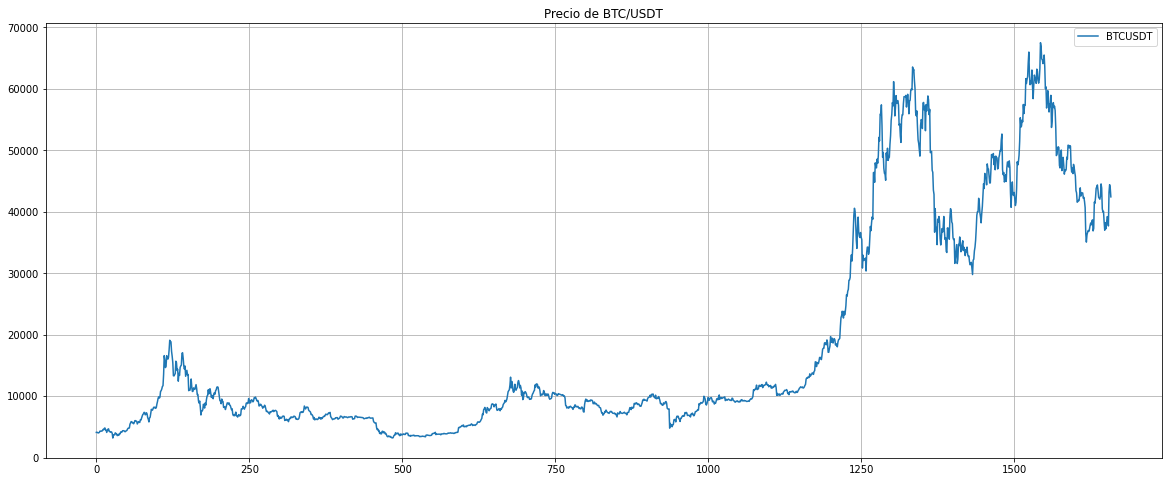

In [ ]:
bitcoin['close'].plot(figsize=(20,8), label='BTCUSDT')
plt.title('Precio de BTC/USDT')
plt.legend()
plt.grid()

https://datasetsearch.research.google.com/search?src=0&query=criptomonedas&docid=L2cvMTFyaHpzX2JfNg%3D%3D

In [ ]:
bitcoin.head()


,open_time,open,high,low,close,volume,close_time,quote,trades,takers_buy_base,takers_buy_quote,ignore
0,1.503014e+12,4285.08,4371.52,3938.77,4108.37,1199.888264,1.503101e+12,5.086958e+06,5233.0,972.868710,4.129123e+06,9384.141409
1,1.503101e+12,4108.37,4184.69,3850.00,4139.98,381.309763,1.503187e+12,1.549484e+06,2153.0,274.336042,1.118002e+06,9184.085529
2,1.503187e+12,4120.98,4211.08,4032.62,4086.29,467.083022,1.503274e+12,1.930364e+06,2321.0,376.795947,1.557401e+06,10125.414084
3,1.503274e+12,4069.13,4119.62,3911.79,4016.00,691.743060,1.503360e+12,2.797232e+06,3972.0,557.356107,2.255663e+06,11706.769970
4,1.503360e+12,4016.00,4104.82,3400.00,4040.00,966.684858,1.503446e+12,3.752506e+06,6494.0,423.995181,1.637188e+06,11773.279500


In [ ]:
bitcoin['close_time'] = pd.to_datetime(bitcoin['close_time'], unit='ms')
bitcoin['close_time'] = bitcoin['close_time'].dt.tz_localize('utc').dt.tz_convert('Europe/Madrid')
bitcoin = bitcoin.set_index('close_time')

In [ ]:
bitcoin.drop('ignore', axis=1, inplace=True)

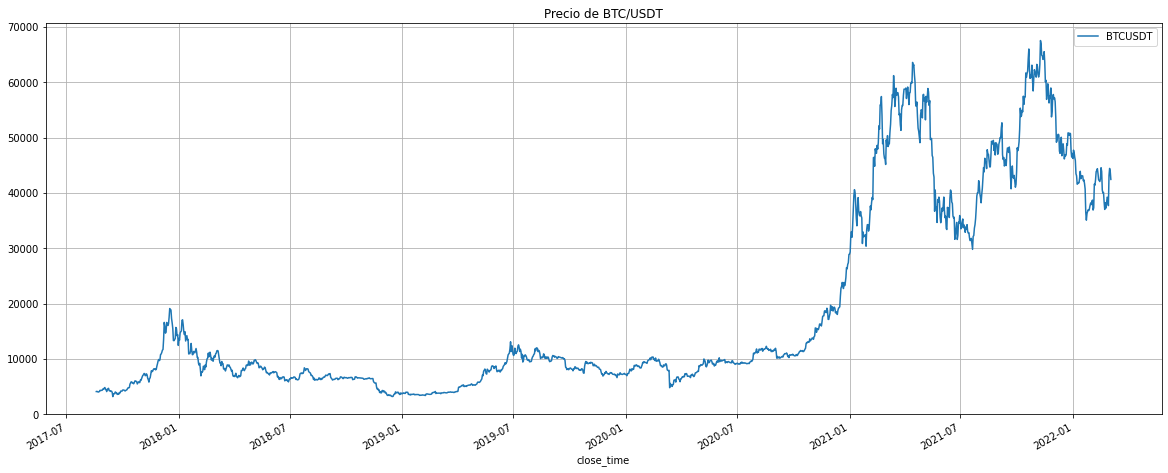

In [ ]:
bitcoin['close'].plot(figsize=(20,8), label='BTCUSDT')
plt.title('Precio de BTC/USDT')
plt.legend()
plt.grid()

In [ ]:
# Siguiente dataset...